In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Enterprise Data Science Group Project/airplane_train_processed_normalized.csv')

In [4]:
df.head(5)

,cat__Gender_Female,cat__Gender_Male,cat__Customer Type_Loyal Customer,cat__Customer Type_disloyal Customer,cat__Type of Travel_Business travel,cat__Type of Travel_Personal Travel,cat__Class_Business,cat__Class_Eco,cat__Class_Eco Plus,std__Age,...,remainder__Online boarding,remainder__Seat comfort,remainder__Inflight entertainment,remainder__On-board service,remainder__Leg room service,remainder__Baggage handling,remainder__Checkin service,remainder__Inflight service,remainder__Cleanliness,remainder__satisfaction
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.746813,...,3,5,5,4,3,4,4,5,5,neutral or dissatisfied
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.952197,...,3,1,1,1,5,3,1,4,1,neutral or dissatisfied
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.885979,...,5,5,5,4,3,4,4,4,5,satisfied
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.952197,...,2,2,2,2,5,3,1,4,2,neutral or dissatisfied
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.431649,...,5,5,3,3,4,4,3,3,3,satisfied


In [5]:
df.columns

Index(['cat__Gender_Female', 'cat__Gender_Male',
       'cat__Customer Type_Loyal Customer',
       'cat__Customer Type_disloyal Customer',
       'cat__Type of Travel_Business travel',
       'cat__Type of Travel_Personal Travel', 'cat__Class_Business',
       'cat__Class_Eco', 'cat__Class_Eco Plus', 'std__Age',
       'std__Flight Distance', 'std__Departure Delay in Minutes',
       'std__Arrival Delay in Minutes', 'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness',
       'remainder__satisfaction'],
      dtype='object')

In [6]:
#Removing the highly correlated columns like 'cat__Gender_Male','cat__Customer Type_disloyal Customer','cat__Type of Travel_Personal Travel','cat__Class_Eco',
df = df[['cat__Gender_Female','cat__Customer Type_Loyal Customer',
       'cat__Type of Travel_Business travel',
        'cat__Class_Business', 'cat__Class_Eco Plus', 'std__Age',
       'std__Flight Distance', 'std__Departure Delay in Minutes',
       'std__Arrival Delay in Minutes', 'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness',
       'remainder__satisfaction']]

In [7]:
X = df[['cat__Gender_Female','cat__Customer Type_Loyal Customer',
       'cat__Type of Travel_Business travel',
        'cat__Class_Business', 'cat__Class_Eco Plus', 'std__Age',
       'std__Flight Distance', 'std__Departure Delay in Minutes',
       'std__Arrival Delay in Minutes', 'remainder__Inflight wifi service',
       'remainder__Departure/Arrival time convenient',
       'remainder__Ease of Online booking', 'remainder__Gate location',
       'remainder__Food and drink', 'remainder__Online boarding',
       'remainder__Seat comfort', 'remainder__Inflight entertainment',
       'remainder__On-board service', 'remainder__Leg room service',
       'remainder__Baggage handling', 'remainder__Checkin service',
       'remainder__Inflight service', 'remainder__Cleanliness']]
y = df['remainder__satisfaction'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
model = lr.fit(X_train,y_train)

In [10]:
y_test_pred = model.predict(X_test)

In [11]:
metrics.accuracy_score(y_test, y_test_pred)

0.878218346786072

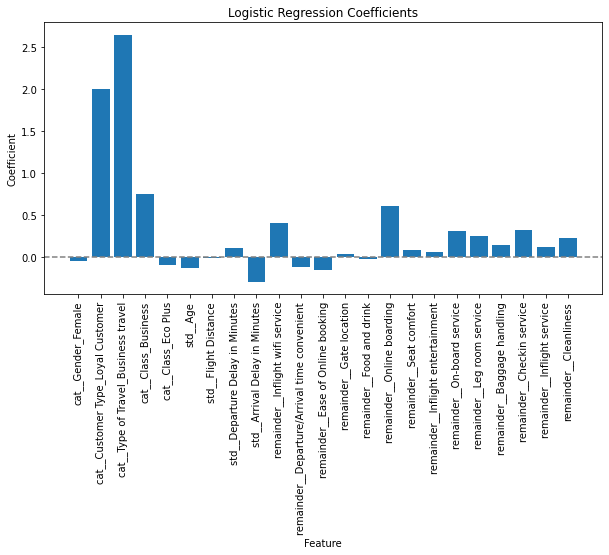

In [12]:
# assume model is a fitted logistic regression model
coefs = model.coef_.ravel()
feature_names = X_train.columns

# create a bar chart of coefficients
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(feature_names, coefs)
ax.axhline(y=0, color='gray', linestyle='--')
ax.set_xlabel('Feature')
ax.set_ylabel('Coefficient')
ax.set_title('Logistic Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 257.44, 'Predicted label')

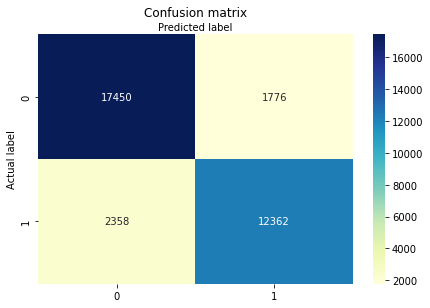

In [13]:
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
class_names=['neutral or dissatisfied','satisfied'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
from sklearn.metrics import precision_score, recall_score

# Assuming y_test is the true labels for X_test
precision = precision_score(y_test, y_test_pred,pos_label='satisfied')
recall = recall_score(y_test, y_test_pred,pos_label='satisfied')

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.8743811005799972
Recall: 0.8398097826086957


The model has  good precision and recall.

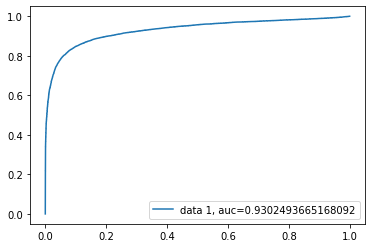

In [15]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='satisfied')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<h2> Support Vector Machine </h2>

In [16]:
from sklearn.svm import SVC
svc_model = SVC()

In [17]:
svc_model.fit(X_train,y_train)

SVC()

In [18]:
predictions = svc_model.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[18494   732]
 [ 1216 13504]]


                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     19226
              satisfied       0.95      0.92      0.93     14720

               accuracy                           0.94     33946
              macro avg       0.94      0.94      0.94     33946
           weighted avg       0.94      0.94      0.94     33946



In [21]:
metrics.accuracy_score(y_test, predictions)

0.9426147410593295

Text(0.5, 257.44, 'Predicted label')

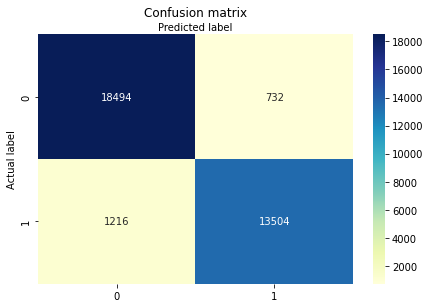

In [23]:
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
class_names=['neutral or dissatisfied','satisfied'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')